import all necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


extract the dataset

In [2]:
data=pd.read_csv("C://Users//SAI BABA//Desktop//Job a thon//train_wn75k28.csv")
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
data.shape

(39161, 19)

data contains 39161 rows and 19 columns

lets we will check the null valuse present in our dataset if any..

In [4]:
data.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

data contains some null values in two column as shown above

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

it gives the detail information about the data with data type,it shows that two column 'created_at' & 'signup_date' has object type of data lets we will encode it 

# data encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()
label=le.fit_transform(data["created_at"])
label
data=data.drop("created_at",axis='columns')
data["created_at"]=label

In [8]:
le=LabelEncoder()
label=le.fit_transform(data["signup_date"])
label
data=data.drop("signup_date",axis='columns')
data["signup_date"]=label
data

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at,signup_date
0,1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1247
1,2,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1242
2,3,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1568
3,4,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,197
4,5,4,6,NaN,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,11,11,2.0,1,0,0,0,1,1,1,0,0,0,0,0,0,364,210
39157,39158,3,9,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,364,1800
39158,39159,8,7,2.0,1,0,0,0,1,0,1,0,0,0,0,0,0,364,1800
39159,39160,7,12,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,364,1800


In [9]:
data.isnull().sum()

id                          0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
created_at                  0
signup_date                 0
dtype: int64

lets we fill null values by mode function 

In [10]:
data['products_purchased']=data['products_purchased'].fillna(data['products_purchased'].mode()[0])


In [11]:
data.isnull().sum()

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
created_at              0
signup_date             0
dtype: int64

there is no any null values now in dataset

In [12]:
data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at,signup_date
count,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.071832,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020,220.504507,1467.861035
std,11304.951283,3.472944,2.614296,0.537865,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042,95.929252,397.660547
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.000000,1226.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,1623.000000
75%,29371.000000,9.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,302.000000,1800.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,364.000000,1800.000000


it gives the detail description about the dataset with its std,mean and mini to max distribution of data in each column,now as some column has mini zero values in it lets we will remove it by mean of respective columns

In [13]:
data['user_activity_var_1']=data['user_activity_var_1'].replace(0,data['user_activity_var_1'].mean())
data['user_activity_var_2']=data['user_activity_var_2'].replace(0,data['user_activity_var_2'].mean())
data['user_activity_var_3']=data['user_activity_var_3'].replace(0,data['user_activity_var_3'].mean())
data['user_activity_var_4']=data['user_activity_var_4'].replace(0,data['user_activity_var_4'].mean())
data['user_activity_var_5']=data['user_activity_var_5'].replace(0,data['user_activity_var_5'].mean())
data['user_activity_var_6']=data['user_activity_var_6'].replace(0,data['user_activity_var_6'].mean())
data['user_activity_var_7']=data['user_activity_var_7'].replace(0,data['user_activity_var_7'].mean())
data['user_activity_var_8']=data['user_activity_var_8'].replace(0,data['user_activity_var_8'].mean())
data['user_activity_var_9']=data['user_activity_var_9'].replace(0,data['user_activity_var_9'].mean())
data['user_activity_var_10']=data['user_activity_var_10'].replace(0,data['user_activity_var_10'].mean())
data['user_activity_var_11']=data['user_activity_var_11'].replace(0,data['user_activity_var_11'].mean())
data['user_activity_var_12']=data['user_activity_var_12'].replace(0,data['user_activity_var_12'].mean())
data['created_at']=data['created_at'].replace(0,data['created_at'].mean())
data['signup_date']=data['signup_date'].replace(0,data['signup_date'].mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    39161 non-null  float64
 4   user_activity_var_1   39161 non-null  float64
 5   user_activity_var_2   39161 non-null  float64
 6   user_activity_var_3   39161 non-null  float64
 7   user_activity_var_4   39161 non-null  float64
 8   user_activity_var_5   39161 non-null  float64
 9   user_activity_var_6   39161 non-null  float64
 10  user_activity_var_7   39161 non-null  float64
 11  user_activity_var_8   39161 non-null  float64
 12  user_activity_var_9   39161 non-null  float64
 13  user_activity_var_10  39161 non-null  float64
 14  user_activity_var_11  39161 non-null  float64
 15  user_activity_var_1

In [15]:
data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at,signup_date
count,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.071832,0.643952,0.013387,0.195089,0.022800,0.280114,0.765023,0.491546,0.318454,0.022749,0.000766,0.391470,0.001123,0.051020,220.622752,1467.898518
std,11304.951283,3.472944,2.614296,0.537865,0.319751,0.081127,0.272509,0.105242,0.305521,0.329649,0.327112,0.313526,0.105129,0.019560,0.344514,0.023682,0.220042,95.793179,397.591358
min,1.000000,1.000000,1.000000,1.000000,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.000000,1.000000,1.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.000000,150.000000,1226.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.000000,234.000000,1623.000000
75%,29371.000000,9.000000,8.000000,2.000000,1.000000,0.006716,0.102832,0.011465,0.151503,1.000000,1.000000,0.174434,0.011440,0.000383,0.218942,0.000562,0.000000,302.000000,1800.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,364.000000,1800.000000


now data is well distributed

In [16]:
data.columns

Index(['id', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy', 'created_at', 'signup_date'],
      dtype='object')

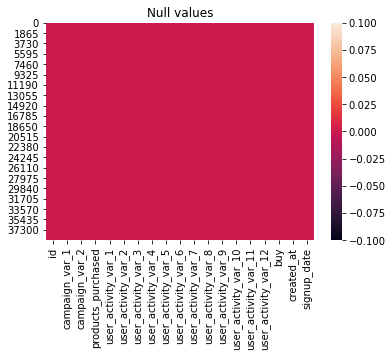

In [17]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

heat map shows that data does not contains any null values in it

In [18]:
import warnings
warnings.filterwarnings('ignore')

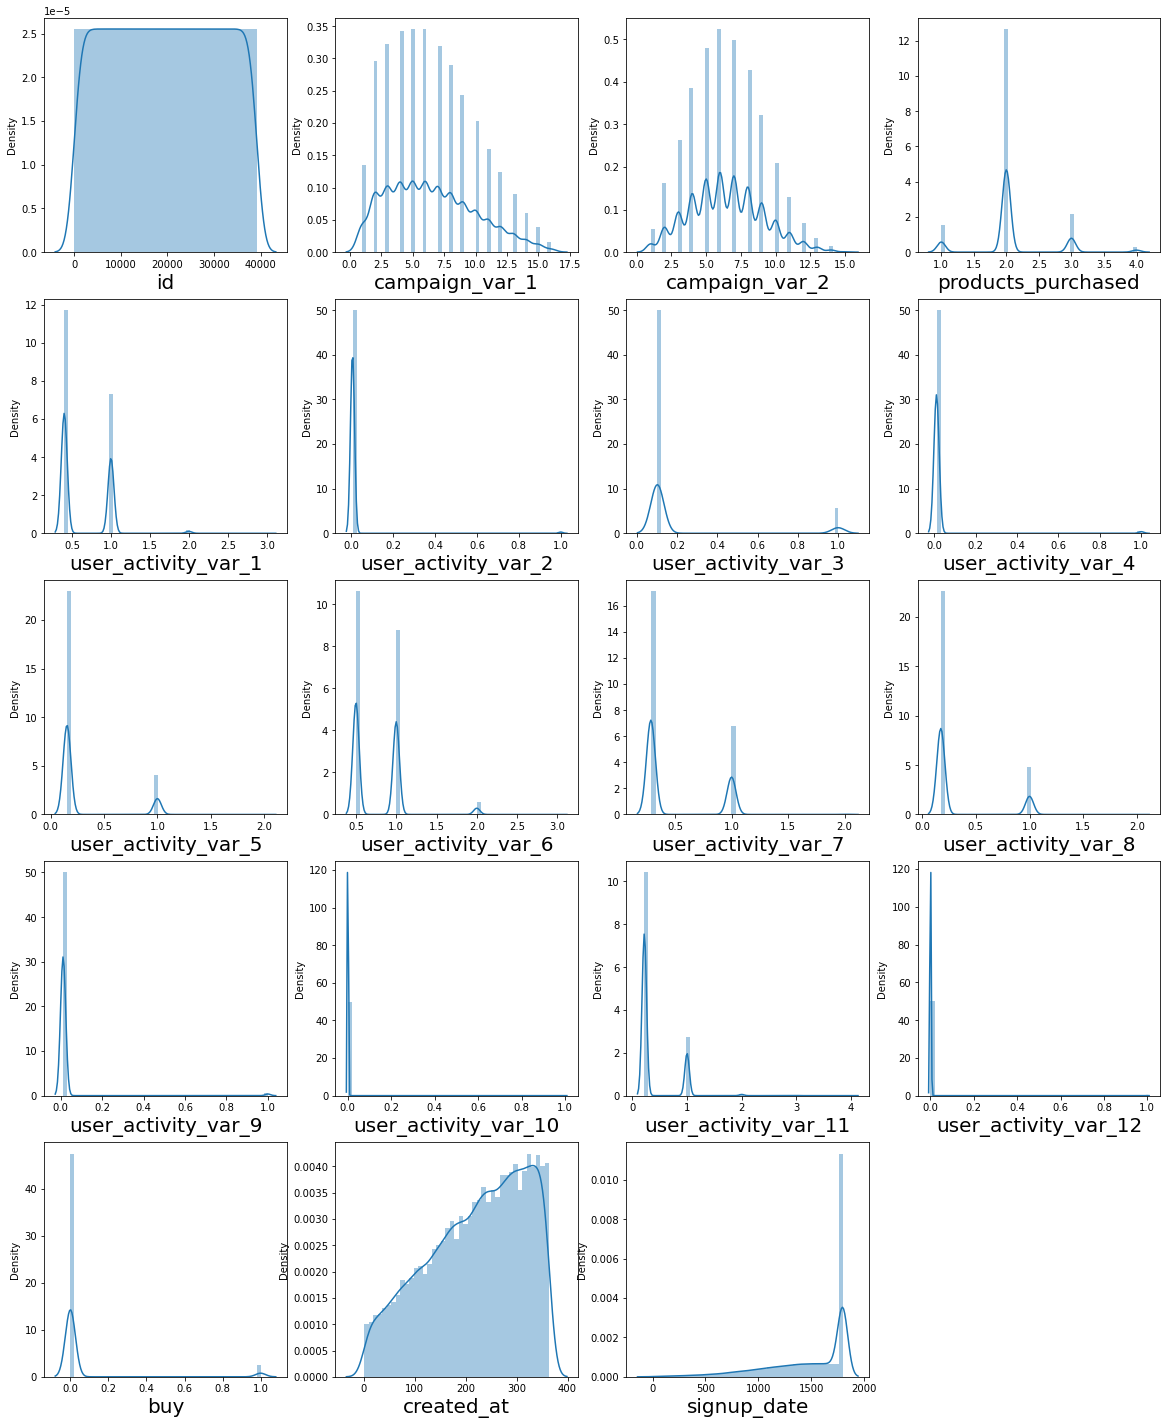

In [19]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=19:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

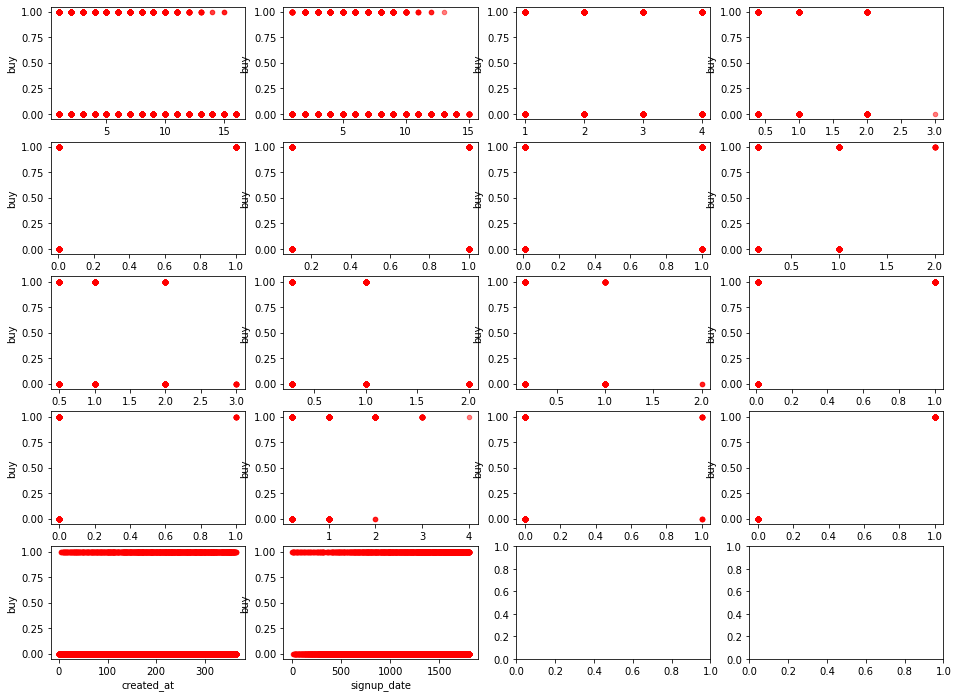

In [20]:
# setup figure
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 12))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='buy', ax=ax, alpha=0.5, color='r')


In [21]:
data.corr()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at,signup_date
id,1.000000,0.143723,0.222746,-0.030068,0.011285,-0.011075,-0.000572,-0.015203,-0.006641,0.015883,0.015888,-0.035246,-0.019808,0.001002,0.025936,-0.009223,-0.020762,0.987469,0.160149
campaign_var_1,0.143723,1.000000,0.561489,-0.027047,0.023557,-0.034548,-0.012670,-0.033510,-0.023151,0.027985,-0.072677,-0.014312,-0.058264,-0.004831,-0.023447,-0.006369,-0.087202,0.146240,0.066320
campaign_var_2,0.222746,0.561489,1.000000,0.001733,-0.033137,-0.039833,-0.008046,-0.038928,-0.030996,0.066333,-0.053510,-0.033886,-0.057942,-0.009879,-0.005309,-0.008228,-0.080064,0.226339,0.102779
products_purchased,-0.030068,-0.027047,0.001733,1.000000,-0.010374,0.007620,0.002928,0.007469,-0.003060,0.002700,0.009725,-0.012467,0.007955,0.004665,-0.000482,-0.005170,0.003556,-0.031341,-0.128335
user_activity_var_1,0.011285,0.023557,-0.033137,-0.010374,1.000000,0.016089,-0.025808,0.016419,-0.014431,-0.180008,-0.085322,-0.046974,0.035843,0.012004,-0.060461,0.002137,0.048011,0.009376,0.009823
user_activity_var_2,-0.011075,-0.034548,-0.039833,0.007620,0.016089,1.000000,-0.001075,0.132108,0.061054,-0.005904,-0.020150,-0.035302,0.155794,0.046324,0.089337,0.024440,0.354627,-0.009899,-0.063058
user_activity_var_3,-0.000572,-0.012670,-0.008046,0.002928,-0.025808,-0.001075,1.000000,0.003023,0.023064,-0.047602,-0.006458,-0.025571,0.003898,0.019152,-0.026622,0.013261,0.005174,-0.000204,-0.013070
user_activity_var_4,-0.015203,-0.033510,-0.038928,0.007469,0.016419,0.132108,0.003023,1.000000,0.071477,-0.020040,-0.004699,-0.039366,0.204941,0.046924,0.070188,0.037937,0.394706,-0.016097,-0.081944
user_activity_var_5,-0.006641,-0.023151,-0.030996,-0.003060,-0.014431,0.061054,0.023064,0.071477,1.000000,-0.073808,-0.007676,-0.031615,0.074682,0.028003,0.023640,0.022942,0.165665,-0.006929,-0.051000
user_activity_var_6,0.015883,0.027985,0.066333,0.002700,-0.180008,-0.005904,-0.047602,-0.020040,-0.073808,1.000000,-0.161349,-0.060094,-0.012947,0.000093,-0.074253,0.000549,-0.011687,0.016582,-0.011579


<AxesSubplot:>

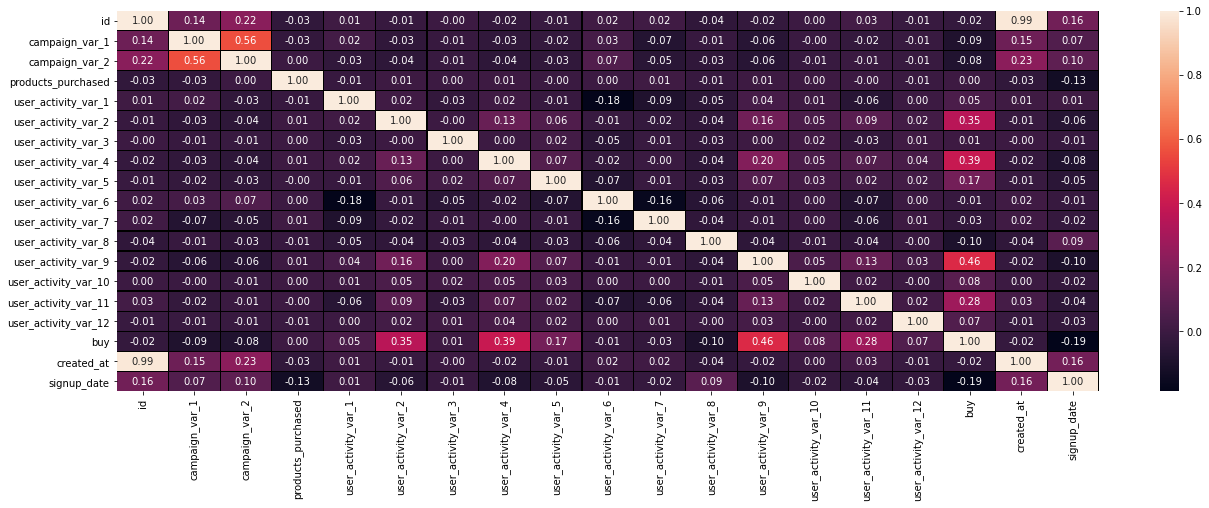

In [22]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

it shows that correlation of each column with the target column also it gives the positive and negative correlation of data with target column,also from it is clear that some of column has zero correlation and some is havinf negative which has not that much imporatance on target column so lets we will drop it

In [23]:
data.drop(['id','campaign_var_1','campaign_var_2','user_activity_var_6'],axis=1,inplace=True)
data.head()

,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at,signup_date
0,2.0,0.400092,0.006716,0.102832,0.011465,0.151503,1.000000,1.000000,0.01144,0.000383,0.218942,0.000562,0,220.504507,1247.0
1,2.0,1.000000,0.006716,1.000000,0.011465,0.151503,1.000000,0.174434,0.01144,0.000383,0.218942,0.000562,0,220.504507,1242.0
2,3.0,1.000000,0.006716,0.102832,0.011465,0.151503,0.286612,0.174434,0.01144,0.000383,0.218942,0.000562,0,220.504507,1568.0
3,2.0,0.400092,0.006716,0.102832,0.011465,0.151503,0.286612,0.174434,0.01144,0.000383,0.218942,0.000562,0,220.504507,197.0
4,2.0,0.400092,0.006716,0.102832,0.011465,0.151503,1.000000,0.174434,0.01144,0.000383,1.000000,0.000562,0,220.504507,1139.0


lets we will check the skewness present in our dataset

In [24]:
data.skew()

products_purchased       0.763673
user_activity_var_1      0.994296
user_activity_var_2     12.079697
user_activity_var_3      2.615292
user_activity_var_4      9.178034
user_activity_var_5      1.980945
user_activity_var_7      1.048613
user_activity_var_8      1.722173
user_activity_var_9      9.188634
user_activity_var_10    51.067930
user_activity_var_11     1.898602
user_activity_var_12    42.156638
buy                      4.081071
created_at              -0.420527
signup_date             -1.168132
dtype: float64

so data contains skewness lets will remove it

In [25]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_7','user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12')
for col in skew :
    if data.skew().loc[col]>0.55:
        data[col] = np.log1p(data[col])

In [26]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([    3,    13,    18, ..., 39139, 39151, 39156], dtype=int64),
 array([14, 14, 14, ..., 12,  0, 14], dtype=int64))

In [27]:
data_new_z=data[(z<3).all(axis=1)]
data_new_z

,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at,signup_date
0,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.693147,0.693147,0.011375,0.000383,0.197984,0.000562,0,220.504507,1247.0
1,2.0,0.693147,0.006693,0.693147,0.0114,0.141068,0.693147,0.160786,0.011375,0.000383,0.197984,0.000562,0,220.504507,1242.0
2,3.0,0.693147,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.197984,0.000562,0,220.504507,1568.0
4,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.693147,0.160786,0.011375,0.000383,0.693147,0.000562,0,220.504507,1139.0
5,3.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.197984,0.000562,0,220.504507,797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39155,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.693147,0.000562,0,364.000000,1800.0
39157,3.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.197984,0.000562,0,364.000000,1800.0
39158,2.0,0.693147,0.006693,0.097881,0.0114,0.693147,0.693147,0.160786,0.011375,0.000383,0.197984,0.000562,0,364.000000,1800.0
39159,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.693147,0.000562,0,364.000000,1800.0


In [28]:
data_new_z.shape

(35795, 15)

so after removing the skewness data contains 35795 rows and 15 column in it

In [29]:
data_new_z.skew()

products_purchased      0.115905
user_activity_var_1     0.487530
user_activity_var_2     0.000000
user_activity_var_3     2.621230
user_activity_var_4     0.000000
user_activity_var_5     2.101534
user_activity_var_7     0.940582
user_activity_var_8     1.628291
user_activity_var_9     0.000000
user_activity_var_10    0.000000
user_activity_var_11    1.557553
user_activity_var_12    0.000000
buy                     0.000000
created_at             -0.431631
signup_date            -1.118121
dtype: float64

array([[<AxesSubplot:title={'center':'products_purchased'}>,
        <AxesSubplot:title={'center':'user_activity_var_1'}>,
        <AxesSubplot:title={'center':'user_activity_var_2'}>],
       [<AxesSubplot:title={'center':'user_activity_var_3'}>,
        <AxesSubplot:title={'center':'user_activity_var_4'}>,
        <AxesSubplot:title={'center':'user_activity_var_5'}>],
       [<AxesSubplot:title={'center':'user_activity_var_7'}>,
        <AxesSubplot:title={'center':'user_activity_var_8'}>,
        <AxesSubplot:title={'center':'user_activity_var_9'}>],
       [<AxesSubplot:title={'center':'user_activity_var_10'}>,
        <AxesSubplot:title={'center':'user_activity_var_11'}>,
        <AxesSubplot:title={'center':'user_activity_var_12'}>],
       [<AxesSubplot:title={'center':'buy'}>,
        <AxesSubplot:title={'center':'created_at'}>,
        <AxesSubplot:title={'center':'signup_date'}>]], dtype=object)

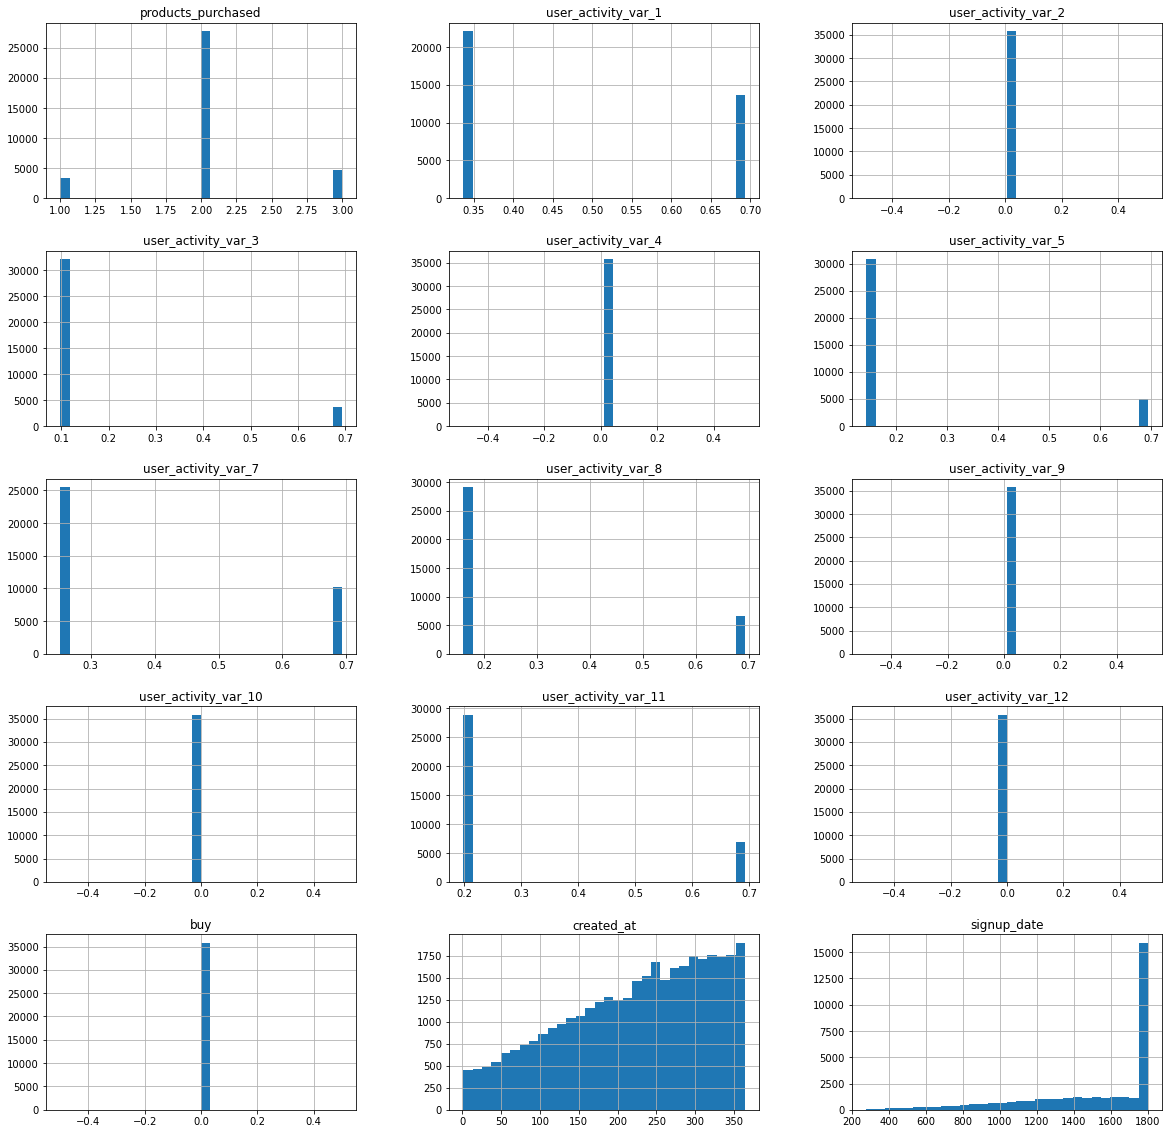

In [30]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data_new_z.hist(figsize=(20,20), grid = True, layout = (5,3), bins = 30)

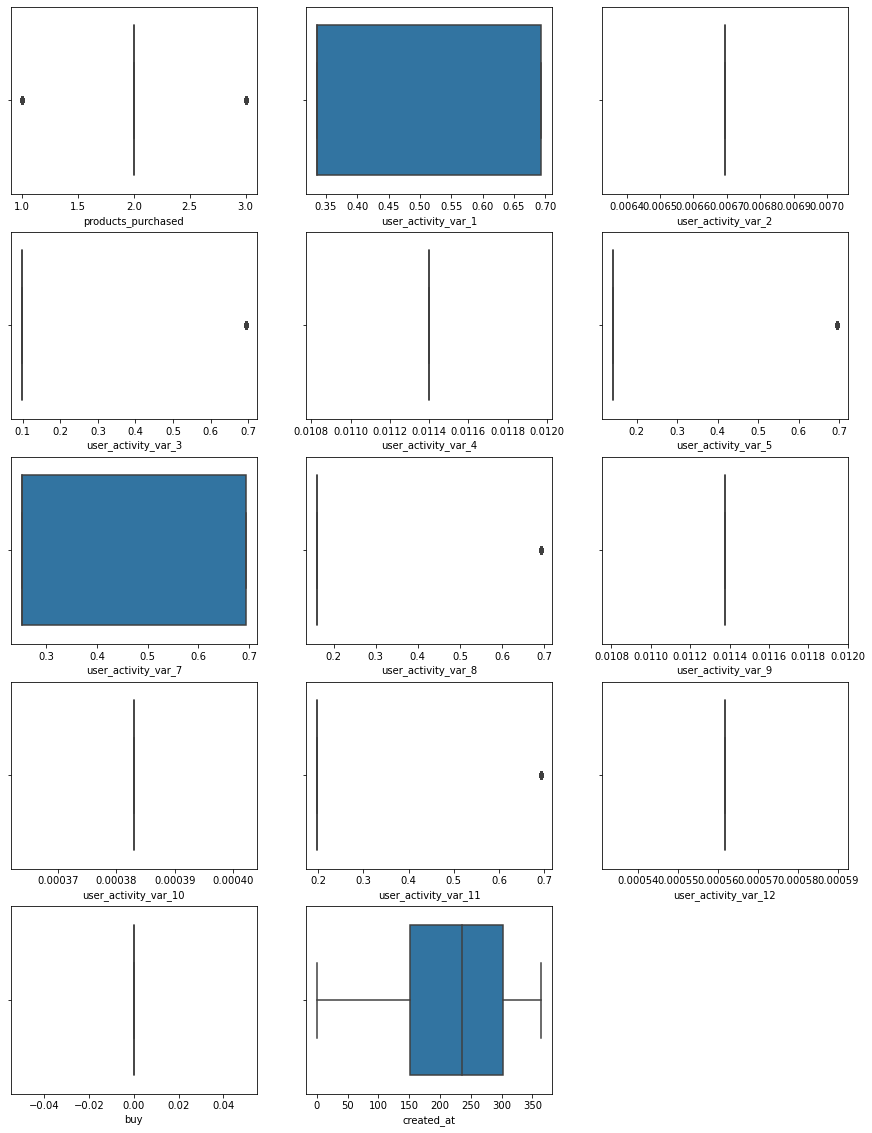

In [31]:
#visualize the outliers using boxplot
plt.figure(figsize=(15,20))
graph=1
for column in data_new_z:
    if graph<15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(data_new_z[column],orient='V')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()        

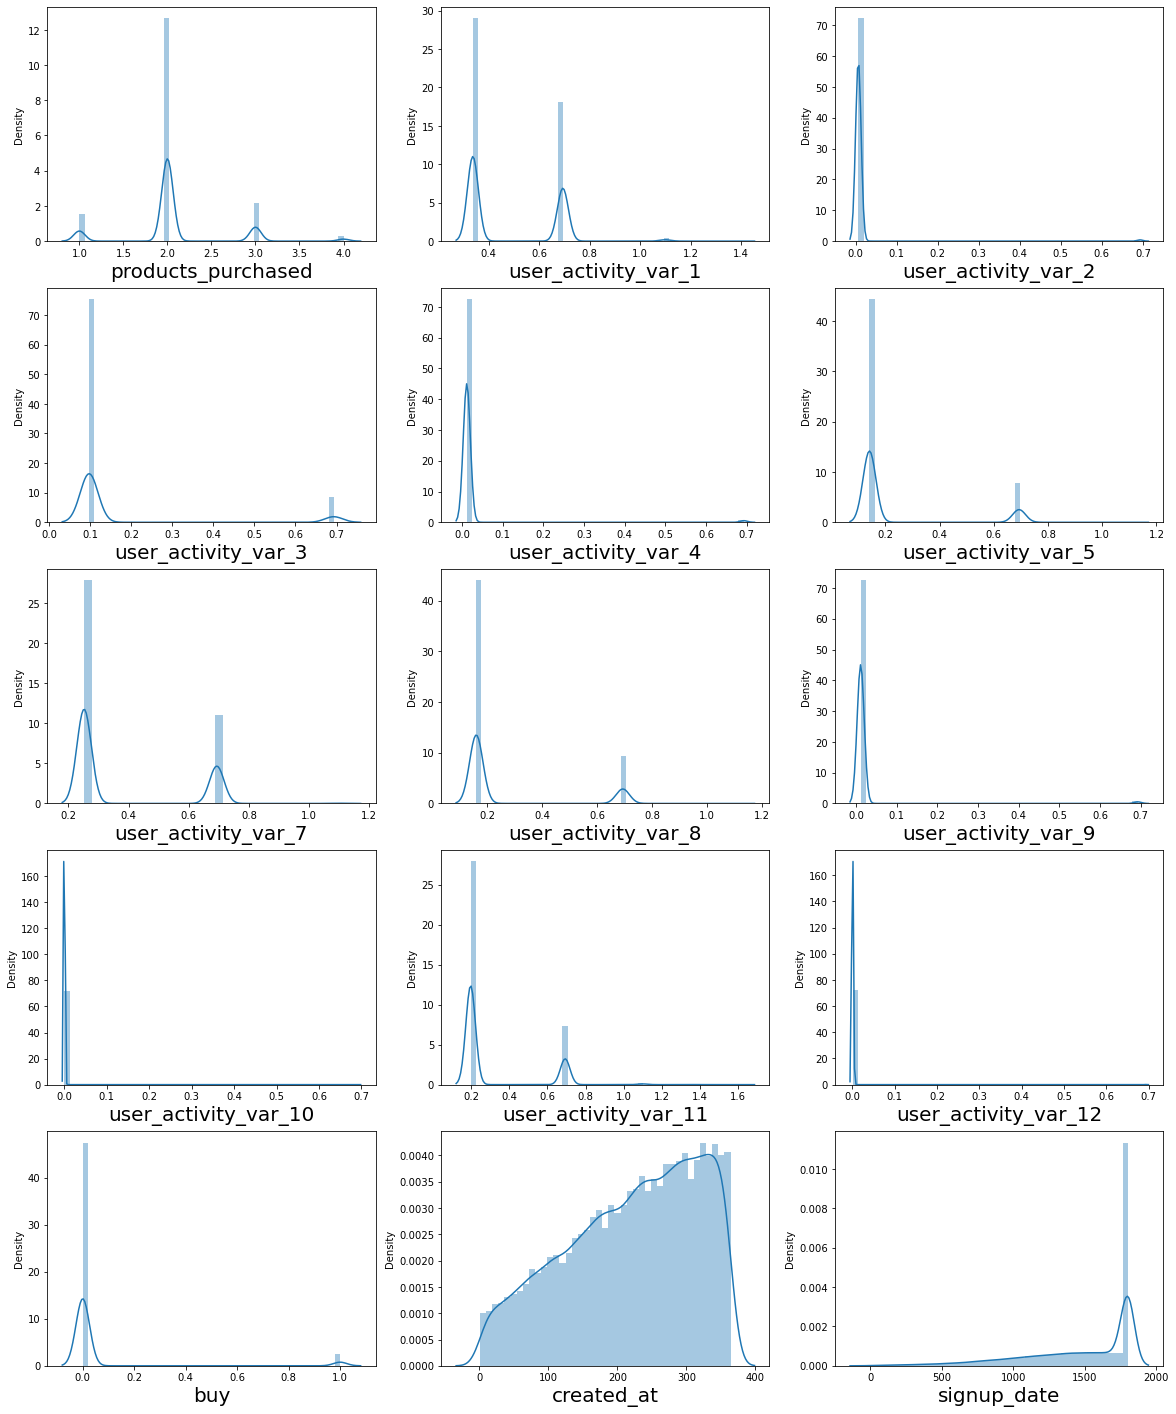

In [32]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

now lets devide dataset into x,y variable

In [33]:
#devide data set into feature and label
y=data['buy']
x=data.drop(['buy'],axis=1)

In [34]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [35]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-1.33551342e-01, -7.81771003e-01, -8.22269607e-02, ...,
        -2.37086310e-02, -1.23439443e-03, -5.55598943e-01],
       [-1.33551342e-01,  1.16584523e+00, -8.22269607e-02, ...,
        -2.37086310e-02, -1.23439443e-03, -5.68174830e-01],
       [ 1.72567514e+00,  1.16584523e+00, -8.22269607e-02, ...,
        -2.37086310e-02, -1.23439443e-03,  2.51772978e-01],
       ...,
       [-1.33551342e-01,  1.16584523e+00, -8.22269607e-02, ...,
        -2.37086310e-02,  1.49675666e+00,  8.35294117e-01],
       [-1.33551342e-01, -7.81771003e-01, -8.22269607e-02, ...,
        -2.37086310e-02,  1.49675666e+00,  8.35294117e-01],
       [-1.33551342e-01,  1.16584523e+00, -8.22269607e-02, ...,
        -2.37086310e-02,  1.49675666e+00, -1.58682165e+00]])

In [39]:
x

,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at,signup_date
0,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.693147,0.693147,0.011375,0.000383,0.197984,0.000562,220.504507,1247.0
1,2.0,0.693147,0.006693,0.693147,0.0114,0.141068,0.693147,0.160786,0.011375,0.000383,0.197984,0.000562,220.504507,1242.0
2,3.0,0.693147,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.197984,0.000562,220.504507,1568.0
3,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.197984,0.000562,220.504507,197.0
4,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.693147,0.160786,0.011375,0.000383,0.693147,0.000562,220.504507,1139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,2.0,0.693147,0.006693,0.097881,0.0114,0.693147,0.693147,0.160786,0.011375,0.000383,0.197984,0.000562,364.000000,210.0
39157,3.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.197984,0.000562,364.000000,1800.0
39158,2.0,0.693147,0.006693,0.097881,0.0114,0.693147,0.693147,0.160786,0.011375,0.000383,0.197984,0.000562,364.000000,1800.0
39159,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.693147,0.000562,364.000000,1800.0


In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
39156    0
39157    0
39158    0
39159    0
39160    0
Name: buy, Length: 39161, dtype: int64

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=40)

In [43]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)
preddt=log_reg.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.974146185764443
[[8922   16]
 [ 227  234]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8938
           1       0.94      0.51      0.66       461

    accuracy                           0.97      9399
   macro avg       0.96      0.75      0.82      9399
weighted avg       0.97      0.97      0.97      9399



In [44]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9551016065538888
[[8706  232]
 [ 190  271]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8938
           1       0.54      0.59      0.56       461

    accuracy                           0.96      9399
   macro avg       0.76      0.78      0.77      9399
weighted avg       0.96      0.96      0.96      9399



In [45]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
preddt=rf.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.97446536865624
[[8909   29]
 [ 211  250]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8938
           1       0.90      0.54      0.68       461

    accuracy                           0.97      9399
   macro avg       0.94      0.77      0.83      9399
weighted avg       0.97      0.97      0.97      9399



In [46]:
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
preddt=kn.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9745717629535057
[[8912   26]
 [ 213  248]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8938
           1       0.91      0.54      0.67       461

    accuracy                           0.97      9399
   macro avg       0.94      0.77      0.83      9399
weighted avg       0.97      0.97      0.97      9399



from above various algorithm it is found that LogisticRegression() has good accuracy 97% with its suitable confusion matrix which summerises the performance of classification algorithm,it also gives the value of precision,recall,f1-score

# AUC-ROC curve

In [47]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

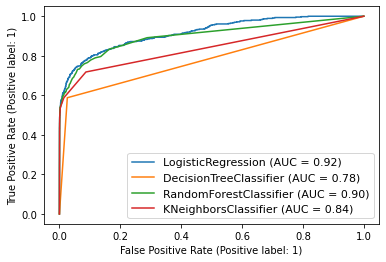

In [48]:
disp=plot_roc_curve(log_reg,x_test,y_test)
disp=plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
disp=plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
disp=plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

from this it is found that LogisticRegression has good accuracy among all also we will cross validate the result further

In [49]:
log_reg=LogisticRegression()

In [50]:
log_reg.fit(x_train,y_train)

LogisticRegression()

# cross validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
for i in range(2,10):
    cv=cross_val_score(log_reg,x,y,cv=i)
    print(log_reg,cv.mean())

LogisticRegression() 0.9630246318701621
LogisticRegression() 0.9706851177538308
LogisticRegression() 0.971757632893146
LogisticRegression() 0.9713745909079824
LogisticRegression() 0.971400123891888
LogisticRegression() 0.9714001491905047
LogisticRegression() 0.9716299176080034
LogisticRegression() 0.9704553576726407


thus we have sucessfully validated the result,we can also predict the output below

In [53]:
#lets plot and visualize
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

so it gives the predicted output

In [54]:
data.tail(5)

,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at,signup_date
39156,2.0,0.693147,0.006693,0.097881,0.0114,0.693147,0.693147,0.160786,0.011375,0.000383,0.197984,0.000562,0,364.0,210.0
39157,3.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.197984,0.000562,0,364.0,1800.0
39158,2.0,0.693147,0.006693,0.097881,0.0114,0.693147,0.693147,0.160786,0.011375,0.000383,0.197984,0.000562,0,364.0,1800.0
39159,2.0,0.336538,0.006693,0.097881,0.0114,0.141068,0.252012,0.160786,0.011375,0.000383,0.693147,0.000562,0,364.0,1800.0
39160,2.0,0.693147,0.006693,0.097881,0.0114,0.141068,0.693147,0.160786,0.011375,0.000383,0.197984,0.000562,0,364.0,837.0


In [55]:
print(' buy is:',log_reg.predict(scalar.transform([[2.000000,0.423036,0.006649,0.089276,0.011272,0.423036,0.526589,0.149097,0.011311,0.000383,0.180640,0.000561,364.0,210.0]])))

 buy is: [0]


# scatter plot

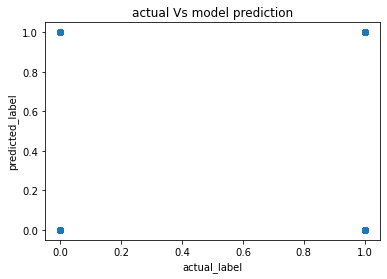

In [56]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_label')
plt.ylabel('predicted_label')
plt.title('actual Vs model prediction')
plt.show()

it gives the actual VS predicted output graph

# Saving Model

In [57]:
#saving model to the local file system
filename='finalized_model_Smart_Lead_Scoring_Engine.pickle'
pickle.dump(log_reg,open(filename,'wb'))
#prediction using the saved model
Loaded_model=pickle.load(open(filename,'rb'))
a=Loaded_model.predict(scalar.transform([[2.000000,0.423036,0.006649,0.089276,0.011272,0.423036,0.526589,0.149097,0.011311,0.000383,0.180640,0.000561,364.0,210.0]]))
a

array([0], dtype=int64)

In [58]:
#Adjusted R2 score
log_reg.score(x_train,y_train)

0.9726496875209999

In [59]:
#check how well model fits the test data
log_reg.score(x_test,y_test)

0.974146185764443

In [60]:
#lets plot and visualize
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# now lets we have test data is also provided from that we will predict the output for saved model

In [61]:
testdata=pd.read_csv("C://Users//SAI BABA//Desktop//Job a thon//test_Wf7sxXF.csv")
testdata.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
testdata.shape

(13184, 18)

In [63]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [64]:
testdata.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

# data encoding

In [65]:
le=LabelEncoder()
label=le.fit_transform(testdata["created_at"])
label
testdata=testdata.drop("created_at",axis='columns')
testdata["created_at"]=label

In [66]:
le=LabelEncoder()
label=le.fit_transform(testdata["signup_date"])
label
testdata=testdata.drop("signup_date",axis='columns')
testdata["signup_date"]=label
testdata

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at,signup_date
0,39162,2,2,NaN,1,1,0,0,0,1,0,0,0,0,1,0,0,1031
1,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0,579
2,39164,8,7,NaN,0,0,0,0,1,1,0,0,0,0,0,0,0,1257
3,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,0,610
4,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,16,12,NaN,0,0,0,0,0,1,1,0,0,0,0,0,88,1257
13180,52342,12,8,NaN,1,0,0,0,0,1,0,0,0,0,0,0,88,1245
13181,52343,14,14,3.0,0,0,1,0,0,0,1,0,0,0,0,0,88,1029
13182,52344,14,10,NaN,0,0,0,0,0,0,1,0,0,0,1,0,88,1257


In [67]:
testdata.isnull().sum()

id                         0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
created_at                 0
signup_date                0
dtype: int64

In [68]:
testdata['products_purchased']=testdata['products_purchased'].fillna(testdata['products_purchased'].mode()[0])

In [69]:
testdata.isnull().sum()

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
created_at              0
signup_date             0
dtype: int64

In [70]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   campaign_var_1        13184 non-null  int64  
 2   campaign_var_2        13184 non-null  int64  
 3   products_purchased    13184 non-null  float64
 4   user_activity_var_1   13184 non-null  int64  
 5   user_activity_var_2   13184 non-null  int64  
 6   user_activity_var_3   13184 non-null  int64  
 7   user_activity_var_4   13184 non-null  int64  
 8   user_activity_var_5   13184 non-null  int64  
 9   user_activity_var_6   13184 non-null  int64  
 10  user_activity_var_7   13184 non-null  int64  
 11  user_activity_var_8   13184 non-null  int64  
 12  user_activity_var_9   13184 non-null  int64  
 13  user_activity_var_10  13184 non-null  int64  
 14  user_activity_var_11  13184 non-null  int64  
 15  user_activity_var_1

In [71]:
testdata.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at,signup_date
count,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000
mean,45753.500000,7.724439,7.943416,2.041717,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,0.304460,0.142673,0.008419,0.000228,0.253413,0.000228,43.308556,1058.298164
std,3806.037309,3.599981,2.687832,0.487658,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,0.462989,0.349969,0.092200,0.015084,0.462698,0.015084,25.442086,296.206581
min,39162.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42457.750000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,924.000000
50%,45753.500000,8.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,1257.000000
75%,49049.250000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1257.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,88.000000,1257.000000


In [72]:
testdata['user_activity_var_1']=testdata['user_activity_var_1'].replace(0,testdata['user_activity_var_1'].mean())
testdata['user_activity_var_2']=testdata['user_activity_var_2'].replace(0,testdata['user_activity_var_2'].mean())
testdata['user_activity_var_3']=testdata['user_activity_var_3'].replace(0,testdata['user_activity_var_3'].mean())
testdata['user_activity_var_4']=testdata['user_activity_var_4'].replace(0,testdata['user_activity_var_4'].mean())
testdata['user_activity_var_5']=testdata['user_activity_var_5'].replace(0,testdata['user_activity_var_5'].mean())
testdata['user_activity_var_6']=testdata['user_activity_var_6'].replace(0,testdata['user_activity_var_6'].mean())
testdata['user_activity_var_7']=testdata['user_activity_var_7'].replace(0,testdata['user_activity_var_7'].mean())
testdata['user_activity_var_8']=testdata['user_activity_var_8'].replace(0,testdata['user_activity_var_8'].mean())
testdata['user_activity_var_9']=testdata['user_activity_var_9'].replace(0,testdata['user_activity_var_9'].mean())
testdata['user_activity_var_10']=testdata['user_activity_var_10'].replace(0,testdata['user_activity_var_10'].mean())
testdata['user_activity_var_11']=testdata['user_activity_var_11'].replace(0,testdata['user_activity_var_11'].mean())
testdata['user_activity_var_12']=testdata['user_activity_var_12'].replace(0,testdata['user_activity_var_12'].mean())
testdata['created_at']=testdata['created_at'].replace(0,testdata['created_at'].mean())
testdata['signup_date']=testdata['signup_date'].replace(0,testdata['signup_date'].mean())

<AxesSubplot:>

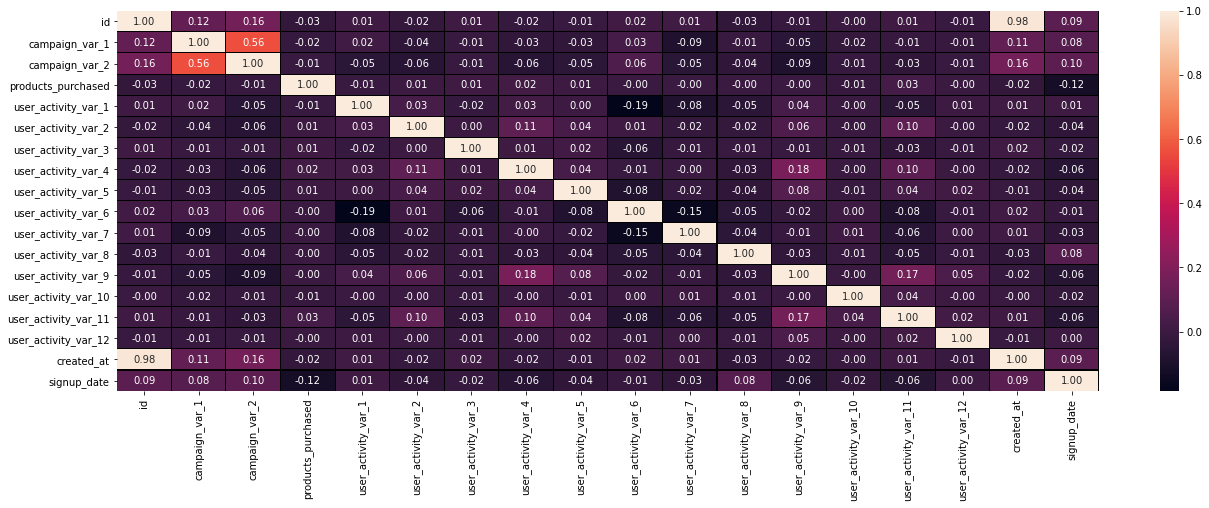

In [73]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(testdata.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [74]:
testdata.drop(['id','campaign_var_1','campaign_var_2','user_activity_var_6'],axis=1,inplace=True)
testdata.head()

,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at,signup_date
0,2.0,1.000000,1.000000,0.103307,0.00713,0.153064,0.30446,0.142673,0.008419,0.000228,1.000000,0.000228,43.308556,1031.0
1,3.0,1.000000,0.004248,0.103307,0.00713,0.153064,0.30446,1.000000,0.008419,0.000228,0.253413,0.000228,43.308556,579.0
2,2.0,0.386681,0.004248,0.103307,0.00713,1.000000,0.30446,0.142673,0.008419,0.000228,0.253413,0.000228,43.308556,1257.0
3,2.0,0.386681,0.004248,0.103307,0.00713,1.000000,1.00000,0.142673,0.008419,0.000228,2.000000,0.000228,43.308556,610.0
4,2.0,1.000000,0.004248,0.103307,0.00713,0.153064,0.30446,0.142673,0.008419,0.000228,0.253413,0.000228,43.308556,871.0


In [75]:
testdata.skew()

products_purchased       0.879682
user_activity_var_1      1.026074
user_activity_var_2     15.247483
user_activity_var_3      2.607036
user_activity_var_4     11.717241
user_activity_var_5      1.947871
user_activity_var_7      0.933846
user_activity_var_8      2.050925
user_activity_var_9     11.055373
user_activity_var_10    66.277194
user_activity_var_11     1.860840
user_activity_var_12    66.277194
created_at               0.015026
signup_date             -1.545777
dtype: float64

In [76]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_7','user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12')
for col in skew :
    if testdata.skew().loc[col]>0.55:
        testdata[col] = np.log1p(testdata[col])

In [77]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(testdata))
threshold=3
np.where(z>3)

(array([    0,     3,    45,   130,   136,   142,   184,   184,   219,
          224,   244,   265,   293,   299,   304,   316,   322,   342,
          355,   373,   377,   380,   387,   396,   398,   409,   423,
          423,   435,   448,   455,   459,   501,   502,   554,   561,
          563,   572,   573,   579,   579,   584,   593,   602,   636,
          660,   664,   677,   694,   701,   709,   715,   715,   728,
          736,   741,   741,   763,   779,   779,   794,   811,   823,
          838,   855,   863,   870,   871,   895,   895,   906,   933,
          946,   956,   967,   987,   998,   998,  1038,  1063,  1067,
         1078,  1086,  1106,  1108,  1108,  1108,  1127,  1131,  1141,
         1177,  1185,  1193,  1202,  1202,  1203,  1206,  1212,  1235,
         1240,  1240,  1262,  1285,  1293,  1296,  1300,  1300,  1306,
         1311,  1315,  1319,  1322,  1326,  1352,  1355,  1369,  1373,
         1378,  1379,  1381,  1388,  1390,  1400,  1421,  1424,  1425,
      

In [78]:
testdata_new_z=testdata[(z<3).all(axis=1)]
testdata_new_z

,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at,signup_date
1,3.0,0.693147,0.004239,0.098312,0.007105,0.142423,0.265789,0.693147,0.008384,0.000228,0.225870,0.000228,43.308556,579.0
2,2.0,0.326913,0.004239,0.098312,0.007105,0.693147,0.265789,0.133370,0.008384,0.000228,0.225870,0.000228,43.308556,1257.0
4,2.0,0.693147,0.004239,0.098312,0.007105,0.142423,0.265789,0.133370,0.008384,0.000228,0.225870,0.000228,43.308556,871.0
5,2.0,0.693147,0.004239,0.098312,0.007105,0.142423,0.265789,0.133370,0.008384,0.000228,0.225870,0.000228,43.308556,1257.0
6,1.0,0.693147,0.004239,0.098312,0.007105,0.142423,0.265789,0.133370,0.008384,0.000228,0.225870,0.000228,43.308556,1053.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,2.0,0.326913,0.004239,0.098312,0.007105,0.142423,0.693147,0.133370,0.008384,0.000228,0.225870,0.000228,88.000000,1257.0
13180,2.0,0.693147,0.004239,0.098312,0.007105,0.142423,0.265789,0.133370,0.008384,0.000228,0.225870,0.000228,88.000000,1245.0
13181,3.0,0.326913,0.004239,0.693147,0.007105,0.142423,0.693147,0.133370,0.008384,0.000228,0.225870,0.000228,88.000000,1029.0
13182,2.0,0.326913,0.004239,0.098312,0.007105,0.142423,0.693147,0.133370,0.008384,0.000228,0.693147,0.000228,88.000000,1257.0


In [79]:
testdata_new_z.skew()

products_purchased      0.048983
user_activity_var_1     0.536661
user_activity_var_2     0.000000
user_activity_var_3     2.594649
user_activity_var_4     0.000000
user_activity_var_5     1.997390
user_activity_var_7     0.855175
user_activity_var_8     1.994648
user_activity_var_9     0.000000
user_activity_var_10    0.000000
user_activity_var_11    1.293882
user_activity_var_12    0.000000
created_at             -0.000498
signup_date            -1.517003
dtype: float64

In [80]:
#saving model to the local file system
filename='finalized_model_Smart_Lead_Scoring_Engine.pickle'
pickle.dump(log_reg,open(filename,'wb'))
#prediction using the saved model
Loaded_model=pickle.load(open(filename,'rb'))
a=Loaded_model.predict(testdata_new_z)
a

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)